In [1]:
import numpy as np
import sys

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

In [2]:
class TrainModel:
    def __init__(self, num_layers, width, batch_size, learning_rate, input_dim, output_dim, input_shape):
        self._input_dim = input_dim  #old, should be deleted everywhere + code adjusted + config changed
        self._input_shape = input_shape
        self._output_dim = output_dim
        self._batch_size = batch_size
        self._learning_rate = learning_rate
        self._model = self._build_model(num_layers, width)
        

class RNNTrainModel(TrainModel):
    def __init__(self, num_layers, width, batch_size, learning_rate, input_dim, output_dim, input_shape, sequence_length):
        self._sequence_length = sequence_length
        super().__init__(num_layers, width, batch_size, learning_rate, input_dim, output_dim, input_shape)
    
    
    def _build_model(self, num_layers, width):
        """
        Build and compile a deep neural network with convolution as LSTM
        """
        
        self._input_shape =  (self._sequence_length,) + self._input_shape
        
        
        #input layer
        inputs = keras.Input(shape = self._input_shape)
                
        #convolutional layers
        c1 = layers.TimeDistributed(layers.Conv2D(filters = 128, kernel_size = 4, strides = (2,2), padding = "same", activation = 'relu'))(inputs)
        c2 = layers.TimeDistributed(layers.Conv2D(filters = 128, kernel_size = 4, strides = (2,2), padding = "same", activation = 'relu'))(c1)
        c3 = layers.TimeDistributed(layers.Conv2D(filters = 64, kernel_size = 2, strides = (1,1), padding = "same", activation = 'relu'))(c2)
        flat = layers.TimeDistributed(layers.Flatten())(c3)
        lstm = layers.LSTM(96, activation='tanh')(flat)
        dense = layers.Dense(16, activation='relu')(lstm)
        outputs = layers.Dense(self._output_dim, activation='linear')(dense)
        
        
        model = keras.Model(inputs = inputs, outputs = dense, name='CNN_with_LSTM')
        model.compile(loss=losses.mean_squared_error, optimizer=Adam(lr=self._learning_rate))
        
        # model.summary()
        return model


    
num_layers=4 
width=4
batch_size=100
learning_rate= 0.001
input_dim=20
output_dim= 4
sequence_length= 8

number_of_cells_per_lane = 10
input_shape = (number_of_cells_per_lane, 8, 1)



Model = RNNTrainModel(num_layers, width, batch_size, learning_rate, input_dim, output_dim, input_shape, sequence_length)

In [3]:
from tensorflow import keras
from pandas import DataFrame
from pandas import concat
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# create sequence
length = 10
sequence = [i/float(length) for i in range(length)]
print(sequence)

# create X/y pairs
df = DataFrame(sequence)
df = concat([df.shift(1), df], axis=1)
df.dropna(inplace=True)

print(df)

# convert to LSTM friendly format
values = df.values
X, y = values[:, 0], values[:, 1]
X = X.reshape(len(X), 1, 1)

print(X)
print(y)

# # 1. define network
# model = Sequential()
# model.add(LSTM(10, input_shape=(1,1)))
# model.add(Dense(1))

# # 2. compile network
# model.compile(optimizer='adam', loss='mean_squared_error')
# # 3. fit network
# history = model.fit(X, y, epochs=1000, batch_size=len(X), verbose=0)
# # 4. evaluate network
# loss = model.evaluate(X, y, verbose=0)
# print(loss)
# # 5. make predictions
# predictions = model.predict(X, verbose=0)
# print(predictions[:, 0])

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
     0    0
1  0.0  0.1
2  0.1  0.2
3  0.2  0.3
4  0.3  0.4
5  0.4  0.5
6  0.5  0.6
7  0.6  0.7
8  0.7  0.8
9  0.8  0.9
[[[0. ]]

 [[0.1]]

 [[0.2]]

 [[0.3]]

 [[0.4]]

 [[0.5]]

 [[0.6]]

 [[0.7]]

 [[0.8]]]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [4]:
import random
import numpy as np


number_of_cells_per_lane = 10
# input_shape = (number_of_cells_per_lane, 8, 1)
input_shape = 1
num_actions = 4
# num_actions = 1
sequence_length = 3



samples = []


for ep in range(10):
    buffer = []
    for s in range(10):
        buffer.append(["state"+str(s)+"_episode_"+str(ep), "action"+str(s)+"_episode_"+str(ep), "reward"+str(s)+"_episode_"+str(ep), "next_state"+str(s)+"_episode_"+str(ep)])
    samples.append(buffer)
print(samples)
print("")





[[['state0_episode_0', 'action0_episode_0', 'reward0_episode_0', 'next_state0_episode_0'], ['state1_episode_0', 'action1_episode_0', 'reward1_episode_0', 'next_state1_episode_0'], ['state2_episode_0', 'action2_episode_0', 'reward2_episode_0', 'next_state2_episode_0'], ['state3_episode_0', 'action3_episode_0', 'reward3_episode_0', 'next_state3_episode_0'], ['state4_episode_0', 'action4_episode_0', 'reward4_episode_0', 'next_state4_episode_0'], ['state5_episode_0', 'action5_episode_0', 'reward5_episode_0', 'next_state5_episode_0'], ['state6_episode_0', 'action6_episode_0', 'reward6_episode_0', 'next_state6_episode_0'], ['state7_episode_0', 'action7_episode_0', 'reward7_episode_0', 'next_state7_episode_0'], ['state8_episode_0', 'action8_episode_0', 'reward8_episode_0', 'next_state8_episode_0'], ['state9_episode_0', 'action9_episode_0', 'reward9_episode_0', 'next_state9_episode_0']], [['state0_episode_1', 'action0_episode_1', 'reward0_episode_1', 'next_state0_episode_1'], ['state1_episode_

In [5]:
sampled_episodes = random.sample(samples, 5)
# print("sampled_epsiodes", sampled_epsiodes)

batch = []              
for episode in sampled_episodes:
    start_point = random.randint(0,len(episode)-sequence_length)
#     print(start_point)
    batch.append(episode[start_point:start_point+sequence_length])
    
print(batch)



[[['state7_episode_5', 'action7_episode_5', 'reward7_episode_5', 'next_state7_episode_5'], ['state8_episode_5', 'action8_episode_5', 'reward8_episode_5', 'next_state8_episode_5'], ['state9_episode_5', 'action9_episode_5', 'reward9_episode_5', 'next_state9_episode_5']], [['state4_episode_4', 'action4_episode_4', 'reward4_episode_4', 'next_state4_episode_4'], ['state5_episode_4', 'action5_episode_4', 'reward5_episode_4', 'next_state5_episode_4'], ['state6_episode_4', 'action6_episode_4', 'reward6_episode_4', 'next_state6_episode_4']], [['state0_episode_6', 'action0_episode_6', 'reward0_episode_6', 'next_state0_episode_6'], ['state1_episode_6', 'action1_episode_6', 'reward1_episode_6', 'next_state1_episode_6'], ['state2_episode_6', 'action2_episode_6', 'reward2_episode_6', 'next_state2_episode_6']], [['state6_episode_2', 'action6_episode_2', 'reward6_episode_2', 'next_state6_episode_2'], ['state7_episode_2', 'action7_episode_2', 'reward7_episode_2', 'next_state7_episode_2'], ['state8_epis

In [6]:
x = np.zeros((len(batch), sequence_length, input_shape), dtype='S16') #from online network
y = np.zeros((len(batch), sequence_length, num_actions))  #from target network

print(x.shape)
print(y.shape)

# print(len(batch))

(5, 3, 1)
(5, 3, 4)


In [7]:
# states = [len(batch), sequence_length], dtype='S16')
states = []
next_states = []

for index_sequence, sequence in enumerate(batch):
    states.append( np.array([val[0] for val in sequence]) )
    next_states.append( np.array([val[3] for val in sequence]) )

states = np.asarray(states)
next_states = np.asarray(next_states)

    

print(states, states.shape )
print(next_states)

[['state7_episode_5' 'state8_episode_5' 'state9_episode_5']
 ['state4_episode_4' 'state5_episode_4' 'state6_episode_4']
 ['state0_episode_6' 'state1_episode_6' 'state2_episode_6']
 ['state6_episode_2' 'state7_episode_2' 'state8_episode_2']
 ['state1_episode_0' 'state2_episode_0' 'state3_episode_0']] (5, 3)
[['next_state7_episode_5' 'next_state8_episode_5' 'next_state9_episode_5']
 ['next_state4_episode_4' 'next_state5_episode_4' 'next_state6_episode_4']
 ['next_state0_episode_6' 'next_state1_episode_6' 'next_state2_episode_6']
 ['next_state6_episode_2' 'next_state7_episode_2' 'next_state8_episode_2']
 ['next_state1_episode_0' 'next_state2_episode_0' 'next_state3_episode_0']]


In [8]:
q_s_a = np.zeros((len(batch), 3, 4))
q_s_a_d = np.zeros((len(batch),3, 4))
print(q_s_a.shape)

gamma = 0.5

for index_sequence, sequence in enumerate(batch):
    for index_step, step in enumerate(sequence):
        state, action, reward, _ = step[0], step[1], step[2], step[3]  # extract data from one sample
    
#         print(index_sequence, "....", index_step)
        current_q = q_s_a[index_sequence][index_step]  # get the Q(state) predicted before
        print("current q: ",current_q)
        
#         print("action: ", action) #action will be 0,1,2,3
        action = random.randint(0, 3)
#         print("action: ", action)
        
            #update with combination of online and target network
        current_q[action] = random.randint(0,10) #reward + "gamma * np.amax(q_s_a_d[index_sequence][index_step])"  # update Q(state, action)
        x[index_sequence][index_step] = state
        y[index_sequence][index_step] = current_q
        
print("x: ,", x, x.shape)
print("y: ,", y,y.shape)
        
        
# print("current-q ", current_q)

# x[i] = state
#         y[i] = current_q  # Q(state) that includes the updated action value

        


        

(5, 3, 4)
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
current q:  [0. 0. 0. 0.]
x: , [[[b'state7_episode_5']
  [b'state8_episode_5']
  [b'state9_episode_5']]

 [[b'state4_episode_4']
  [b'state5_episode_4']
  [b'state6_episode_4']]

 [[b'state0_episode_6']
  [b'state1_episode_6']
  [b'state2_episode_6']]

 [[b'state6_episode_2']
  [b'state7_episode_2']
  [b'state8_episode_2']]

 [[b'state1_episode_0']
  [b'state2_episode_0']
  [b'state3_episode_0']]] (5, 3, 1)
y: , [[[ 0.  0.  0.  0.]
  [ 0.  9.  0.  0.]
  [ 0.  0.  2.  0.]]

 [[ 0.  0.  0.  4.]
  [ 0.  0.  0.  8.]
  [ 0.  0.  3.  0.]]

 [[ 0.  0.  7.  0.]
  [ 9.  0.  0.  0.]
  [ 0.  0.  0.  9.]]

 [[ 0.  0. 10.  0.]
  [ 

In [9]:
import numpy as np

In [10]:
a = np.zeros((2,3,4))
print(a)
print("-----------")


a[1][0][0]=2
print(a)




[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
-----------
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[2. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [11]:
b=[]

b.append(1)

print(b)

[1]


In [12]:
import pandas as pd

def rollavg_pandas(a,n):
        'Pandas rolling average over data set a with window size n. Returns a centered np array of same size'
        return np.ravel(pd.DataFrame(a).rolling(n, center=True, min_periods=1).mean().to_numpy())


data = [1,8]
    
roling_window = 8
        # if (len(data>=roling_wind
data = rollavg_pandas(data, roling_window)

print(data)

[4.5 4.5]


In [13]:
def hello():
    q=1
    w=2
    e=[1,2,3,4,5,6]
    
    return [q,w,e]

print(hello())

[1, 2, [1, 2, 3, 4, 5, 6]]


In [14]:
print(np.zeros(4))

[0. 0. 0. 0.]


In [15]:
#SET STATE DIMENSION PARAMETERS
number_of_cells_per_lane = 10
conv_state_shape = (number_of_cells_per_lane, 8, 2)
green_phase_state_shape = 4
elapsed_time_state_shape = 1
state_shape = [conv_state_shape, green_phase_state_shape, elapsed_time_state_shape]
 
print(state_shape)

print([state_shape[0], state_shape[1], state_shape[2]])


[(10, 8, 2), 4, 1]
[(10, 8, 2), 4, 1]


In [16]:
green_phase_state = np.zeros(state_shape[1])
green_phase_state[2] = 1

print(green_phase_state)

[0. 0. 1. 0.]


In [138]:
L = []


for x in range(15):
    temp = []
    for y in range (8):
        temp.append([np.random.rand(2,8,2), np.random.rand(4), 23])
    L.append(temp)
              
# print(L)
L = np.asarray(L)
print(L.shape)
print(L[0][0][0].shape)
print(L[0][0][1].shape)
# print(L[0][0][2].shape)



(15, 8, 3)
(2, 8, 2)
(4,)


In [154]:


print("------")

# K0 = L[:,:,0]
K1 = L[:,:,1]
K2 = L[:,:,2]
print("K1: ", K1.shape, K1)

print("-----")
print(K1[0][0].shape, K1[0][0], type(K1[0][0]))


------
K1:  (15, 8) [[array([0.72194925, 0.13249349, 0.23985721, 0.15108811])
  array([0.74695959, 0.83746817, 0.78686262, 0.21518637])
  array([0.31017053, 0.28269686, 0.11470445, 0.2025268 ])
  array([0.42145421, 0.14231809, 0.51734662, 0.57608904])
  array([0.47058012, 0.62286882, 0.95549819, 0.6581156 ])
  array([0.66887955, 0.14706339, 0.22555752, 0.09086751])
  array([0.71455728, 0.01795196, 0.00757105, 0.86973219])
  array([0.7216828 , 0.28744799, 0.71812129, 0.04499142])]
 [array([0.34896867, 0.73015786, 0.76751576, 0.46391517])
  array([0.69769706, 0.06636875, 0.99339521, 0.2065901 ])
  array([0.0088289 , 0.12189542, 0.36458536, 0.44945449])
  array([0.21771335, 0.91014727, 0.23446575, 0.10093442])
  array([0.93146427, 0.50093307, 0.9493339 , 0.25024973])
  array([0.64035396, 0.84648585, 0.25918246, 0.68870684])
  array([0.78421616, 0.90322299, 0.6068617 , 0.96936303])
  array([0.02092947, 0.52917791, 0.14504042, 0.70590951])]
 [array([0.61863311, 0.04095308, 0.83137789, 0.279

In [152]:
print(K1.shape)
J1 = np.concatenate(K1) 
J11 = np.concatenate(J1).reshape((15,8,4))
print(J11.shape, J11)
print('---------')
print(J1.shape, J1)

(15, 8)
(15, 8, 4) [[[7.21949251e-01 1.32493488e-01 2.39857210e-01 1.51088106e-01]
  [7.46959590e-01 8.37468166e-01 7.86862618e-01 2.15186372e-01]
  [3.10170531e-01 2.82696856e-01 1.14704445e-01 2.02526796e-01]
  [4.21454211e-01 1.42318086e-01 5.17346620e-01 5.76089039e-01]
  [4.70580120e-01 6.22868820e-01 9.55498192e-01 6.58115599e-01]
  [6.68879552e-01 1.47063387e-01 2.25557516e-01 9.08675097e-02]
  [7.14557275e-01 1.79519589e-02 7.57104575e-03 8.69732187e-01]
  [7.21682795e-01 2.87447989e-01 7.18121287e-01 4.49914212e-02]]

 [[3.48968668e-01 7.30157856e-01 7.67515756e-01 4.63915166e-01]
  [6.97697061e-01 6.63687513e-02 9.93395213e-01 2.06590099e-01]
  [8.82889937e-03 1.21895418e-01 3.64585357e-01 4.49454492e-01]
  [2.17713352e-01 9.10147270e-01 2.34465747e-01 1.00934421e-01]
  [9.31464272e-01 5.00933066e-01 9.49333900e-01 2.50249729e-01]
  [6.40353962e-01 8.46485850e-01 2.59182463e-01 6.88706837e-01]
  [7.84216162e-01 9.03222990e-01 6.06861703e-01 9.69363027e-01]
  [2.09294659e-02 5

In [159]:
# print(K2.shape, K2)

J2 = np.array(K2, dtype=np.float)
J3 = np.expand_dims(J2, axis = 2)

print(J2.shape, J2)
print(J3.shape, J3)

(15, 8) [[23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]
 [23. 23. 23. 23. 23. 23. 23. 23.]]
(15, 8, 1) [[[23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]]

 [[23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]]

 [[23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]]

 [[23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]]

 [[23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]]

 [[23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]]

 [[23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [23.]
  [

In [121]:
#SET STATE DIMENSION PARAMETERS
number_of_cells_per_lane = 10
conv_state_shape = (number_of_cells_per_lane, 8, 2)
green_phase_state_shape = 4
elapsed_time_state_shape = 1
state_shape = [conv_state_shape, green_phase_state_shape, elapsed_time_state_shape]
 
    
print(state_shape)

# sequence_state_shape = (None, ) + state_shape[i] 

# for i in range(len(state_shape)):
#     print(i)
#     sequence_state_shape = (None, ) + state_shape[i]

sequence_state_shape = []
sequence_state_shape.append((1,1) +state_shape[0])
sequence_state_shape.append((1,1, state_shape[1]))
sequence_state_shape.append((1,1, state_shape[2]))
    

print(sequence_state_shape)
print(sequence_state_shape[1])

[(10, 8, 2), 4, 1]
[(1, 1, 10, 8, 2), (1, 1, 4), (1, 1, 1)]
(1, 1, 4)


In [126]:
print(L[:,2].shape)
print(L[:,2][0])

new = L[:,2][0]
new2 = np.expand_dims((new,), axis=(0,1))
# new = (1,1,new)

print(new2.shape)
print(new2)

(15,)
23
(1, 1, 1)
[[[23]]]


In [172]:
number_of_cars_of_type = 1

if number_of_cars_of_type > 0:    
    average_delay = 10 / number_of_cars_of_type
else:
    average_delay = 0
print(average_delay)

10.0


In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

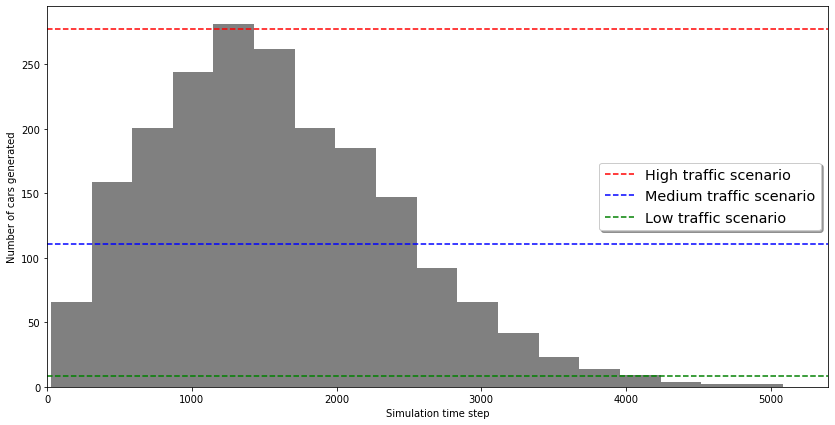

In [45]:
timings = np.random.weibull(2, 2000)

timings = np.sort(timings)

car_gen_steps = []
min_old = math.floor(timings[0])
max_old = math.ceil(timings[-1])
min_new = 0
max_new = 5400
for value in timings:
    car_gen_steps = np.append(car_gen_steps, ((max_new - min_new) / (max_old - min_old)) * (value - max_old) + max_new)
    
# print(car_gen_steps)

fig, ax = plt.subplots()

count, bins, ignored = plt.hist(car_gen_steps, bins=18, color = 'grey')


plt.xlabel("Simulation time step")
plt.ylabel("Number of cars generated")
fig = plt.gcf()
fig.set_size_inches(14, 7)

plt.plot([0,5400], [277.7, 277.7], color ='red',linestyle = '--', label = "High traffic scenario")
plt.plot([0,5400],[111.1,111.1], color ='blue',linestyle = '--', label = "Medium traffic scenario")
plt.plot([0,5400],[8.33,8.33], color = 'green', linestyle = '--', label = "Low traffic scenario")

plt.xlim([0, 5400]) 

legend = ax.legend(loc='best', shadow=True, fontsize='x-large')


plt.show()

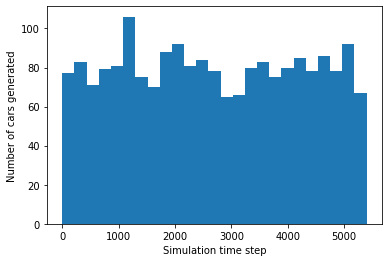

In [49]:
timings = np.random.uniform(0, 5400, 2000)

plt.hist(timings, bins=25)
plt.xlabel("Simulation time step")
plt.ylabel("Number of cars generated")

plt.show()